In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replace blanks  with 0 as tenure is 0 and no total charges are recorded

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df["customerID"].duplicated().sum()

0

In [18]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

# Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

<function matplotlib.pyplot.show(close=None, block=None)>

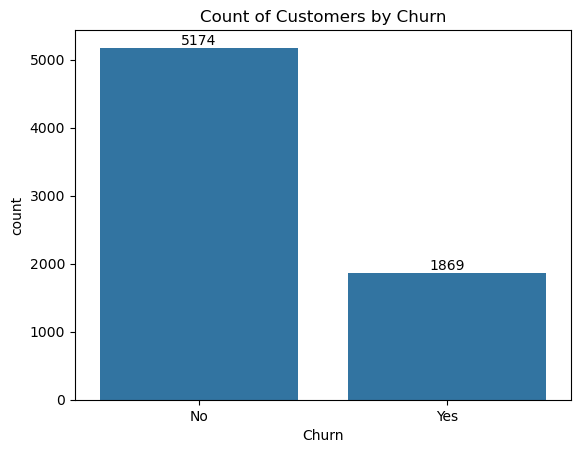

In [34]:
ax = sns.countplot(x = "Churn", data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show

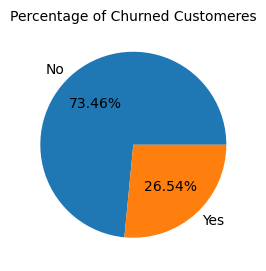

In [35]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

# from the given pie chart we can conclude that 26.54% of our customer have churned out. 
# Now lets explore the reason behind it  

<function matplotlib.pyplot.show(close=None, block=None)>

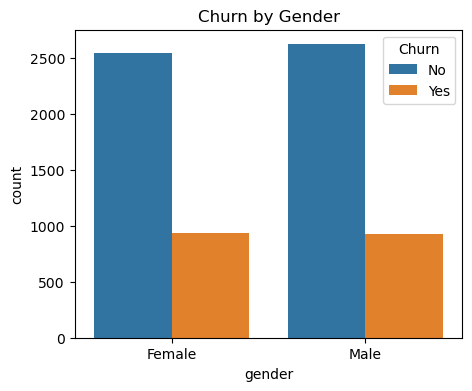

In [43]:
plt.figure(figsize = (5,4))
sns.countplot(x = "gender",data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

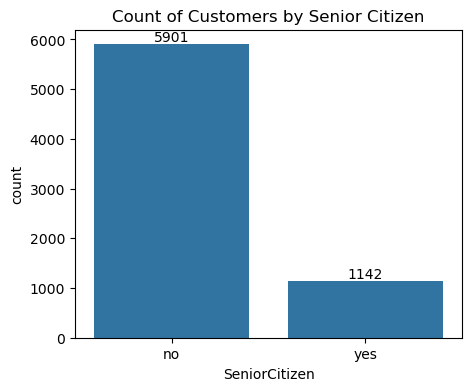

In [64]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show 

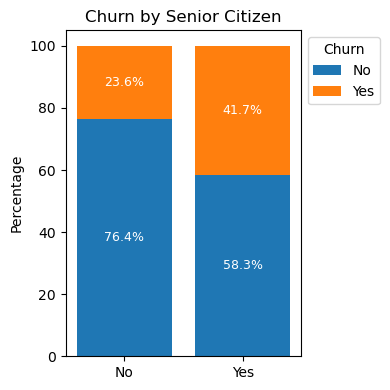

In [67]:
# Group and calculate count by SeniorCitizen and Churn
grouped = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)

# Calculate row-wise percentage
percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

# Plot
colors = ['#1f77b4', '#ff7f0e']  # Blue for 'No', Orange for 'Yes'
fig, ax = plt.subplots(figsize=(4, 4))

bottom = [0] * len(percentages)
for idx, churn_status in enumerate(['No', 'Yes']):
    values = percentages[churn_status]
    ax.bar(
        percentages.index,
        values,
        bottom=bottom,
        label=churn_status,
        color=colors[idx]
    )
    
    # Add % text inside each segment
    for i, (val, btm) in enumerate(zip(values, bottom)):
        ax.text(i, btm + val / 2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=9)

    # Update bottom for stacking
    bottom = [btm + val for btm, val in zip(bottom, values)]

# Formatting
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])  # 0 = Not SeniorCitizen, 1 = SeniorCitizen
ax.set_title("Churn by Senior Citizen")
ax.set_ylabel("Percentage")
ax.legend(title="Churn", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

# Comparative a greater percentage of people in senior citizen category have churned

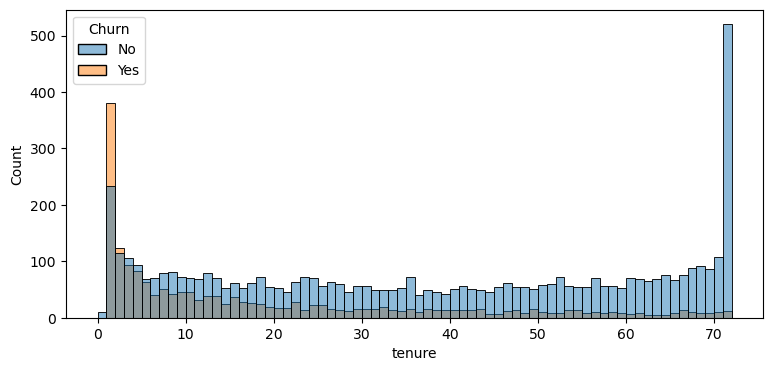

In [71]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72,  hue = "Churn")
plt.show()

# People who have used our services for a long time have stayed and people who have used our services # 1 or 2 months have churned

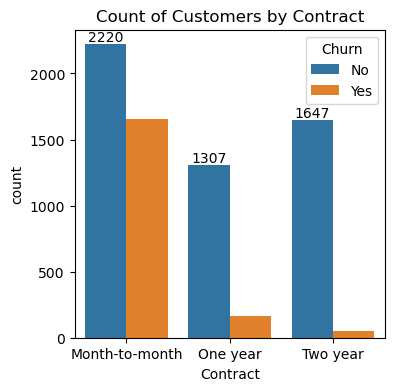

In [74]:
plt.figure(figsize =(4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

# People who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [75]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

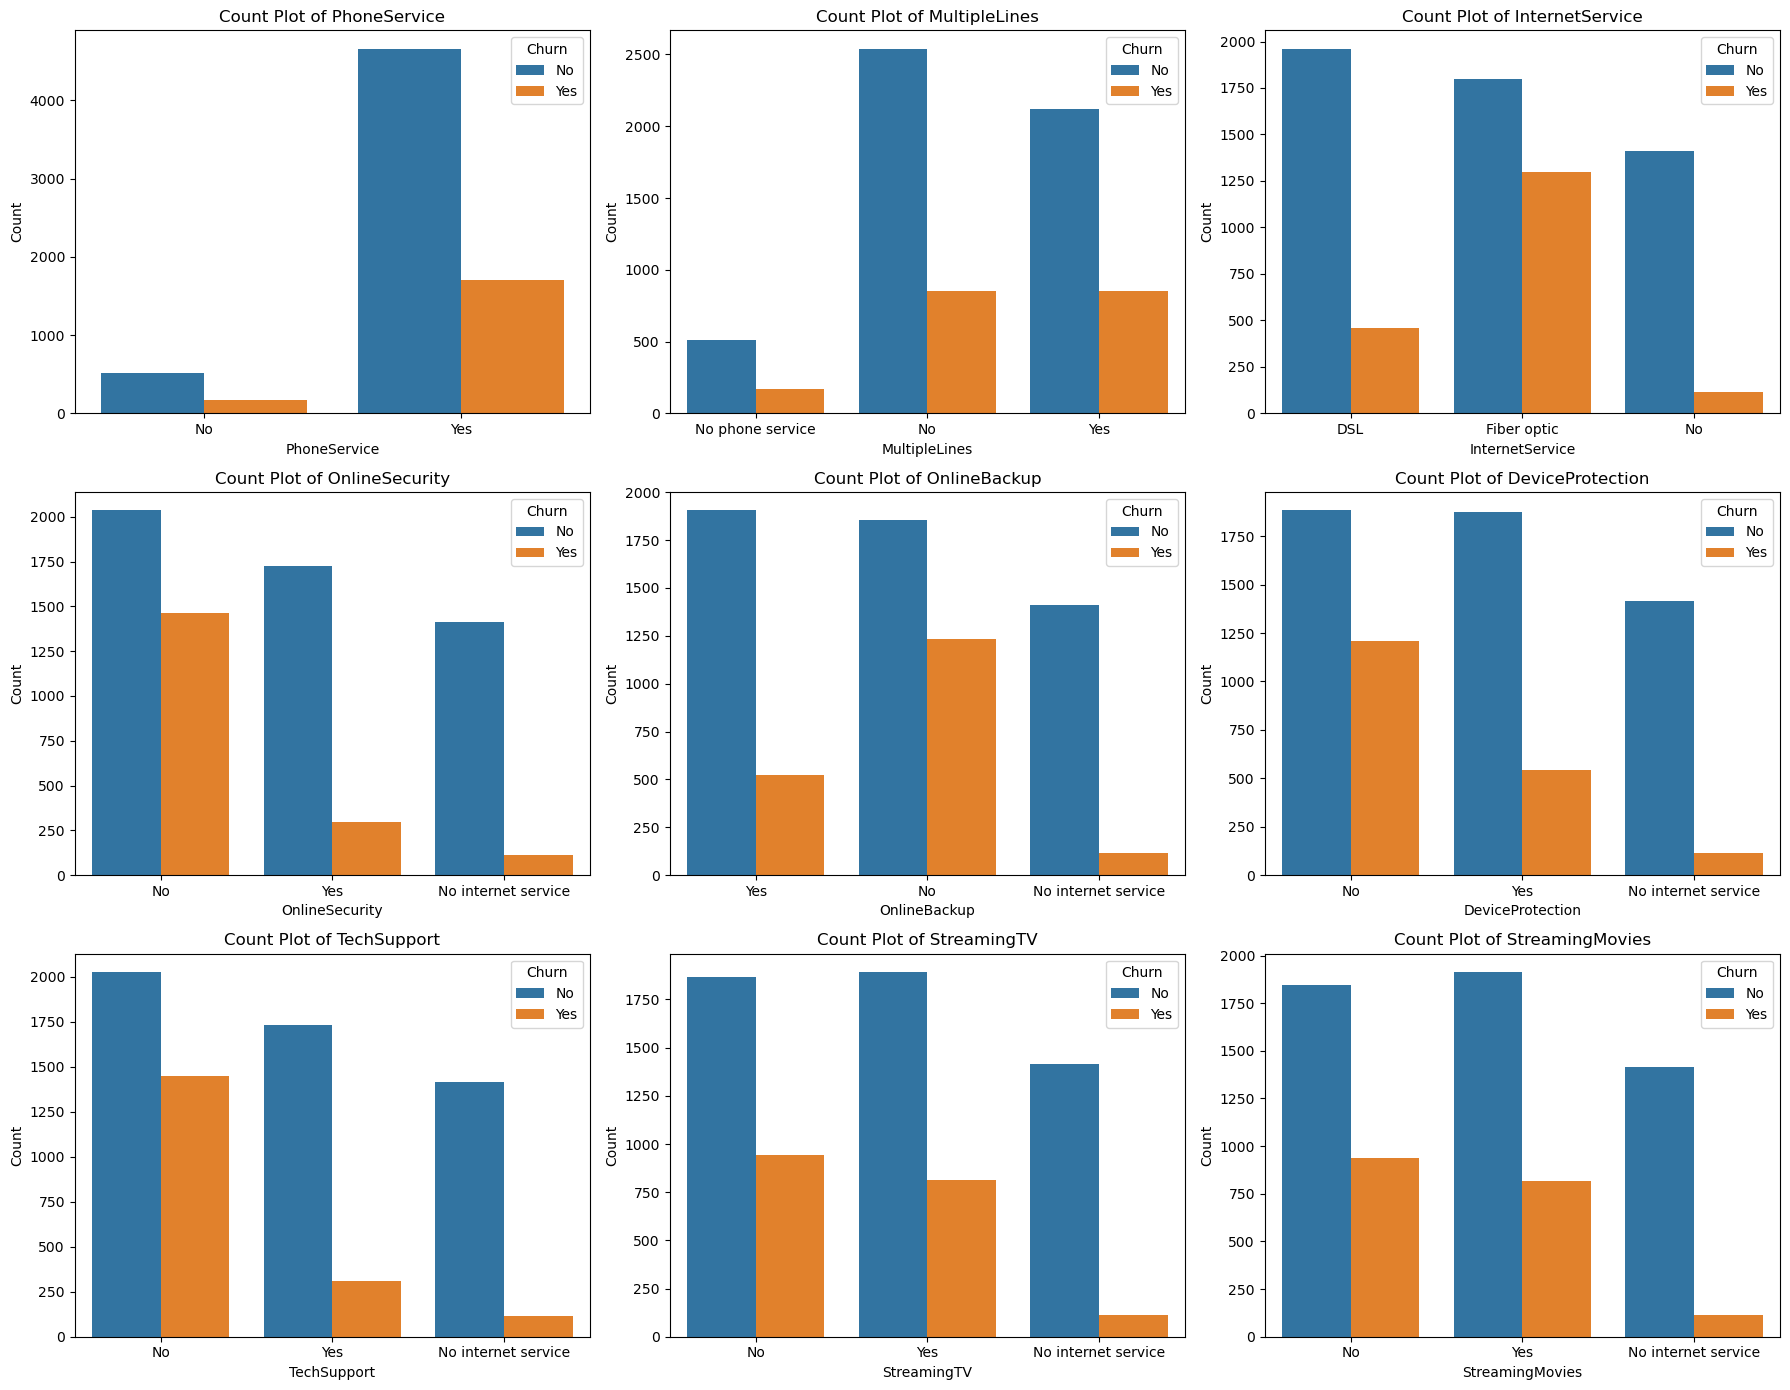

In [83]:
# Columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set figure size
plt.figure(figsize=(18, 14))

# Loop through each column and create a subplot
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns
    sns.countplot(data=df, x=col, hue = df["Churn"])
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Rotate if needed for readability

# Improve spacing
plt.tight_layout()
plt.show()


# Most customers who did not churn are concentrated in categories like having PhoneService, OnlineSecurity = No, and StreamingTV = No.
# Churn is relatively higher among customers who have Fiber optic InternetService and lack online features like OnlineSecurity, TechSupport, and DeviceProtection.
# The “No internet service” group consistently shows low churn, likely because they don’t use those services.

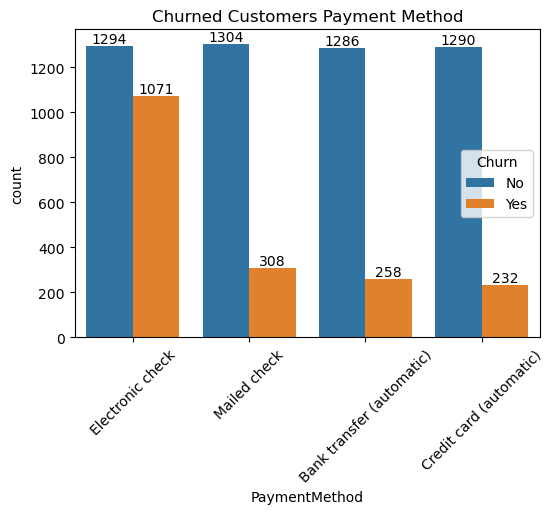

In [89]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers Payment Method")
plt.xticks(rotation = 45)
plt.show()

# Customer is likely to churn when he is using electronic check as a payment method.